In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

train = pd.read_csv(r"train_final.csv").drop(columns=['id'])

print(f'train set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')

train.head()

train set은 23 개의 feature를 가진 2999 개의 데이터 샘플로 이루어져 있습니다.


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Male,Loyal Customer,72,Business travel,Business,1784,1,1,4,1,...,2,2,3,2,5,2,0,0,0,1
1,Male,Loyal Customer,35,Business travel,Business,2228,2,5,5,5,...,2,2,2,2,4,2,0,0,8,0
2,Male,disloyal Customer,37,Business travel,Eco,1970,4,3,4,1,...,1,3,2,5,1,4,0,1,2,1
3,Female,Loyal Customer,20,Personal Travel,Eco,2249,5,5,1,3,...,1,4,1,4,1,5,0,0,0,1
4,Male,disloyal Customer,38,Business travel,Eco,1995,2,2,2,2,...,5,2,5,3,1,2,0,110,102,0


# EDA

## 결측치 확인

In [2]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


## 분포 확인

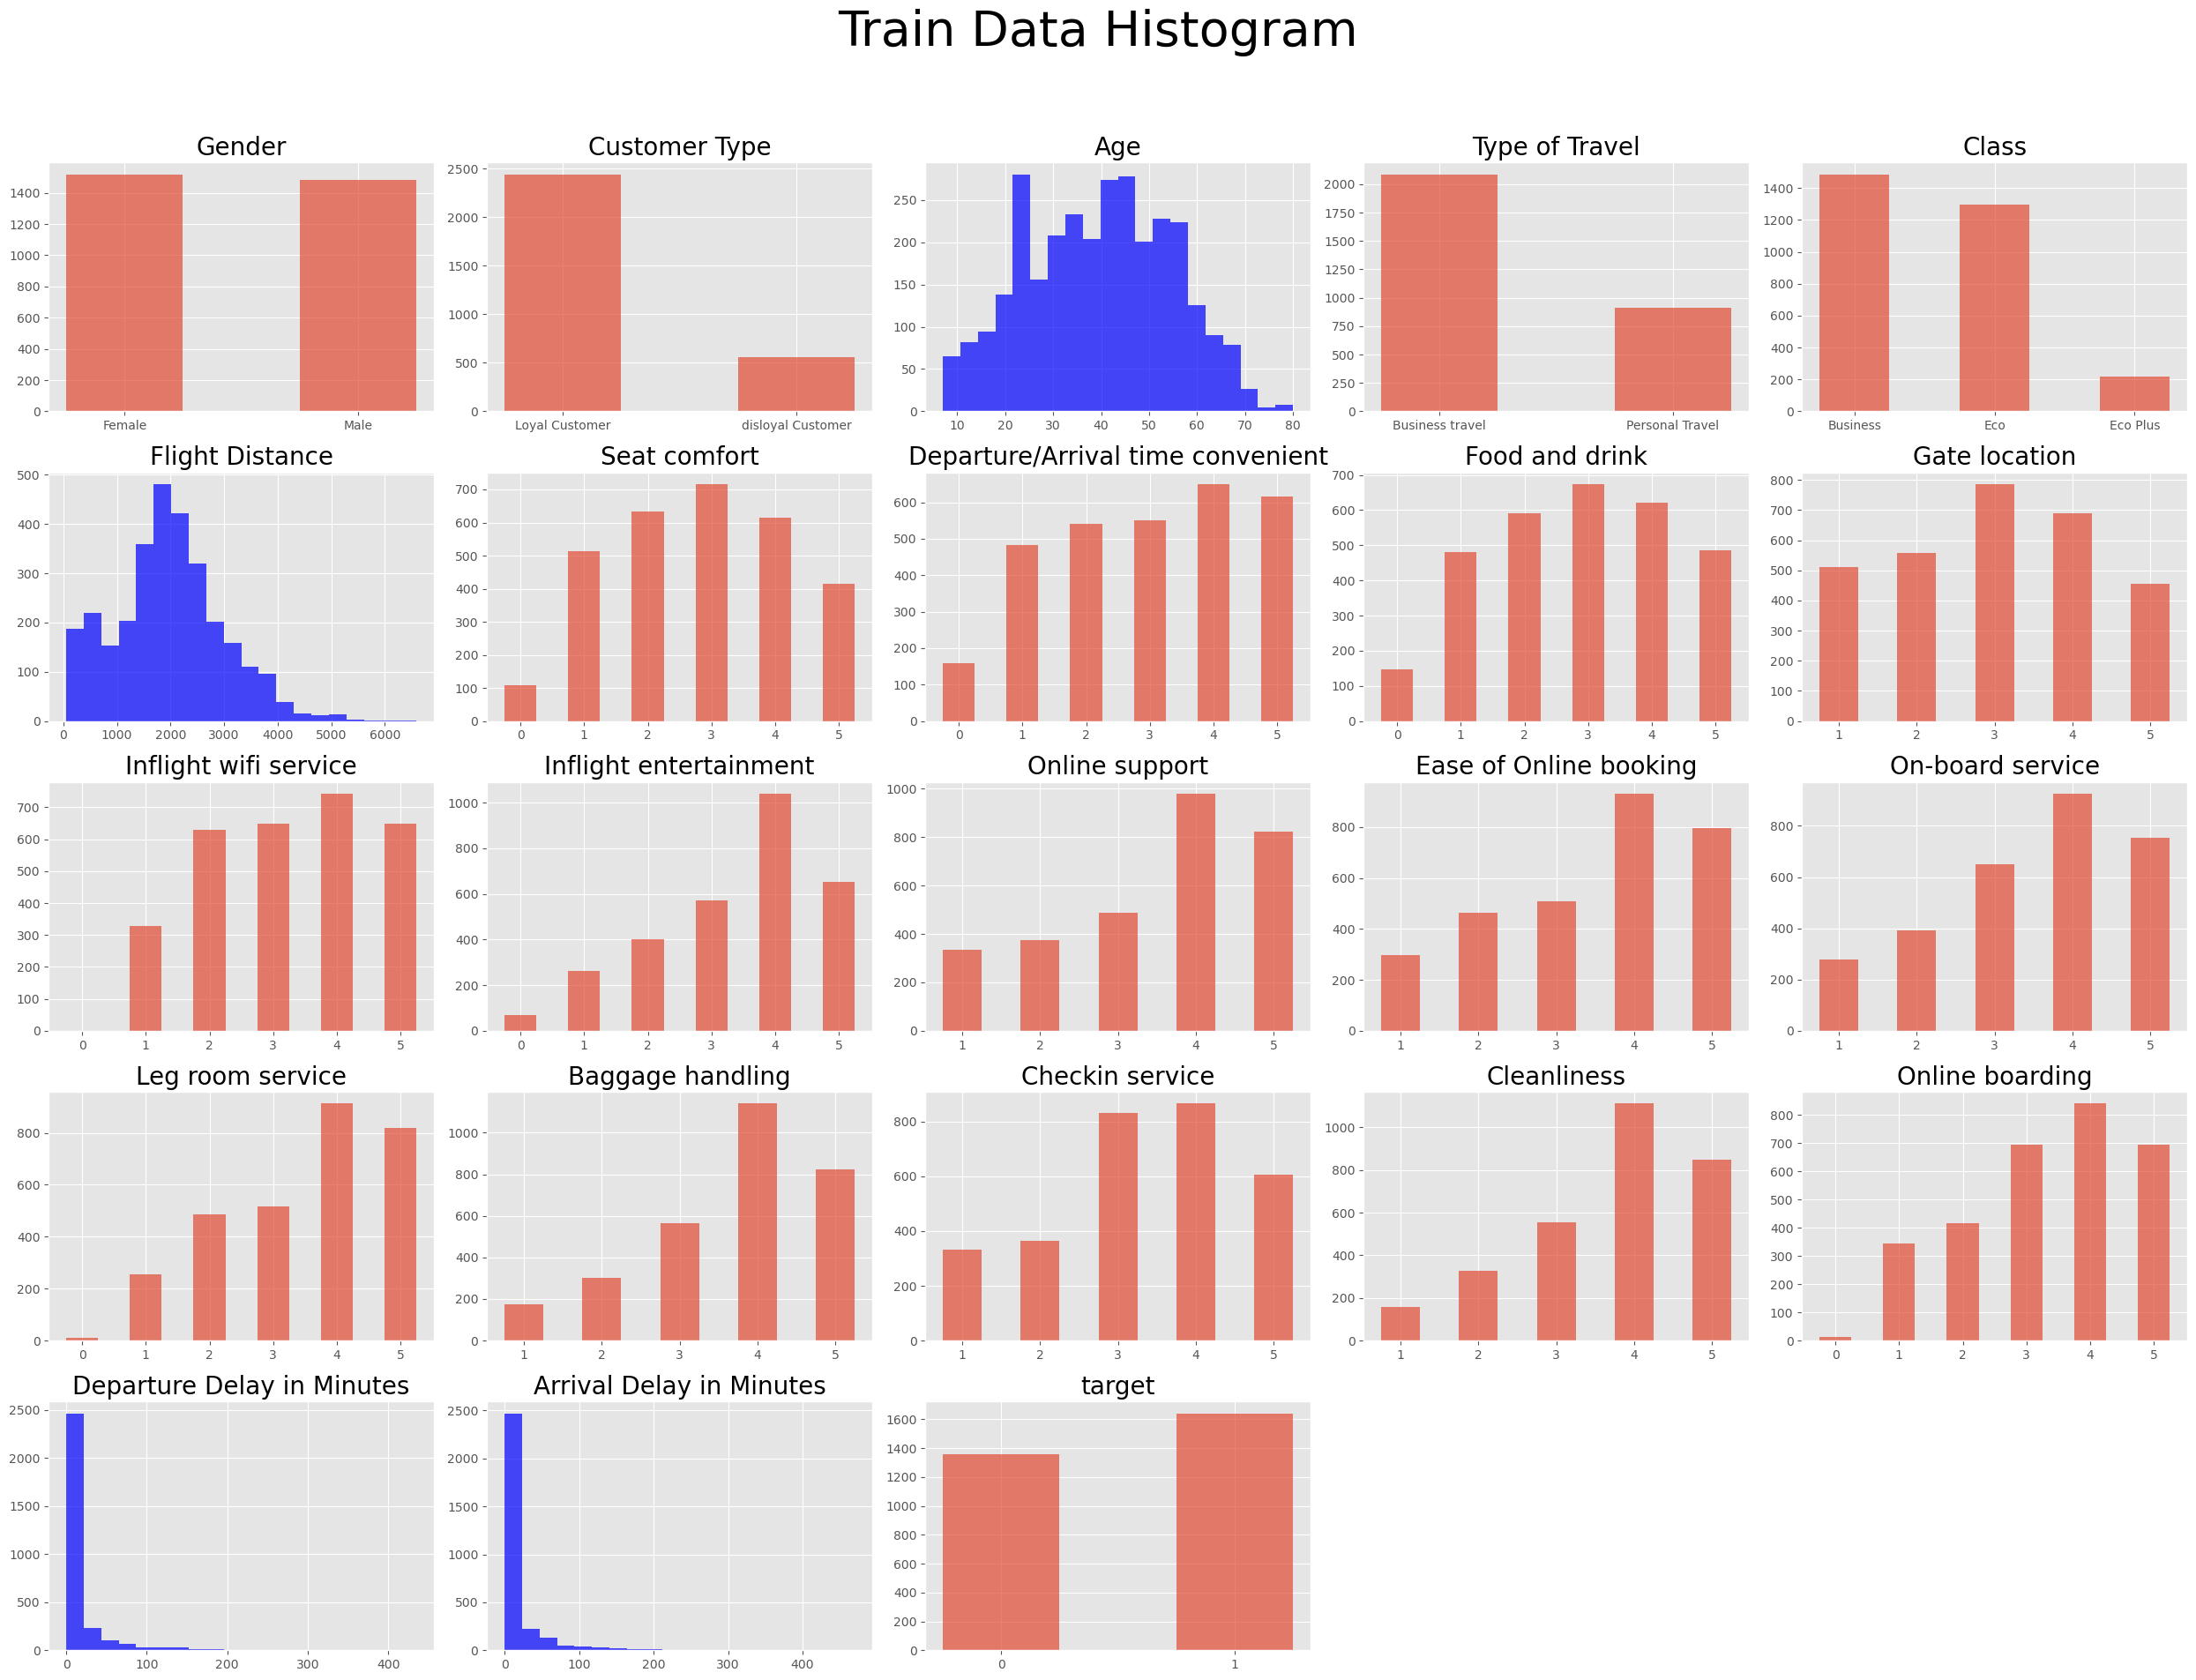

In [3]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Train Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 바이올린 플롯 확인

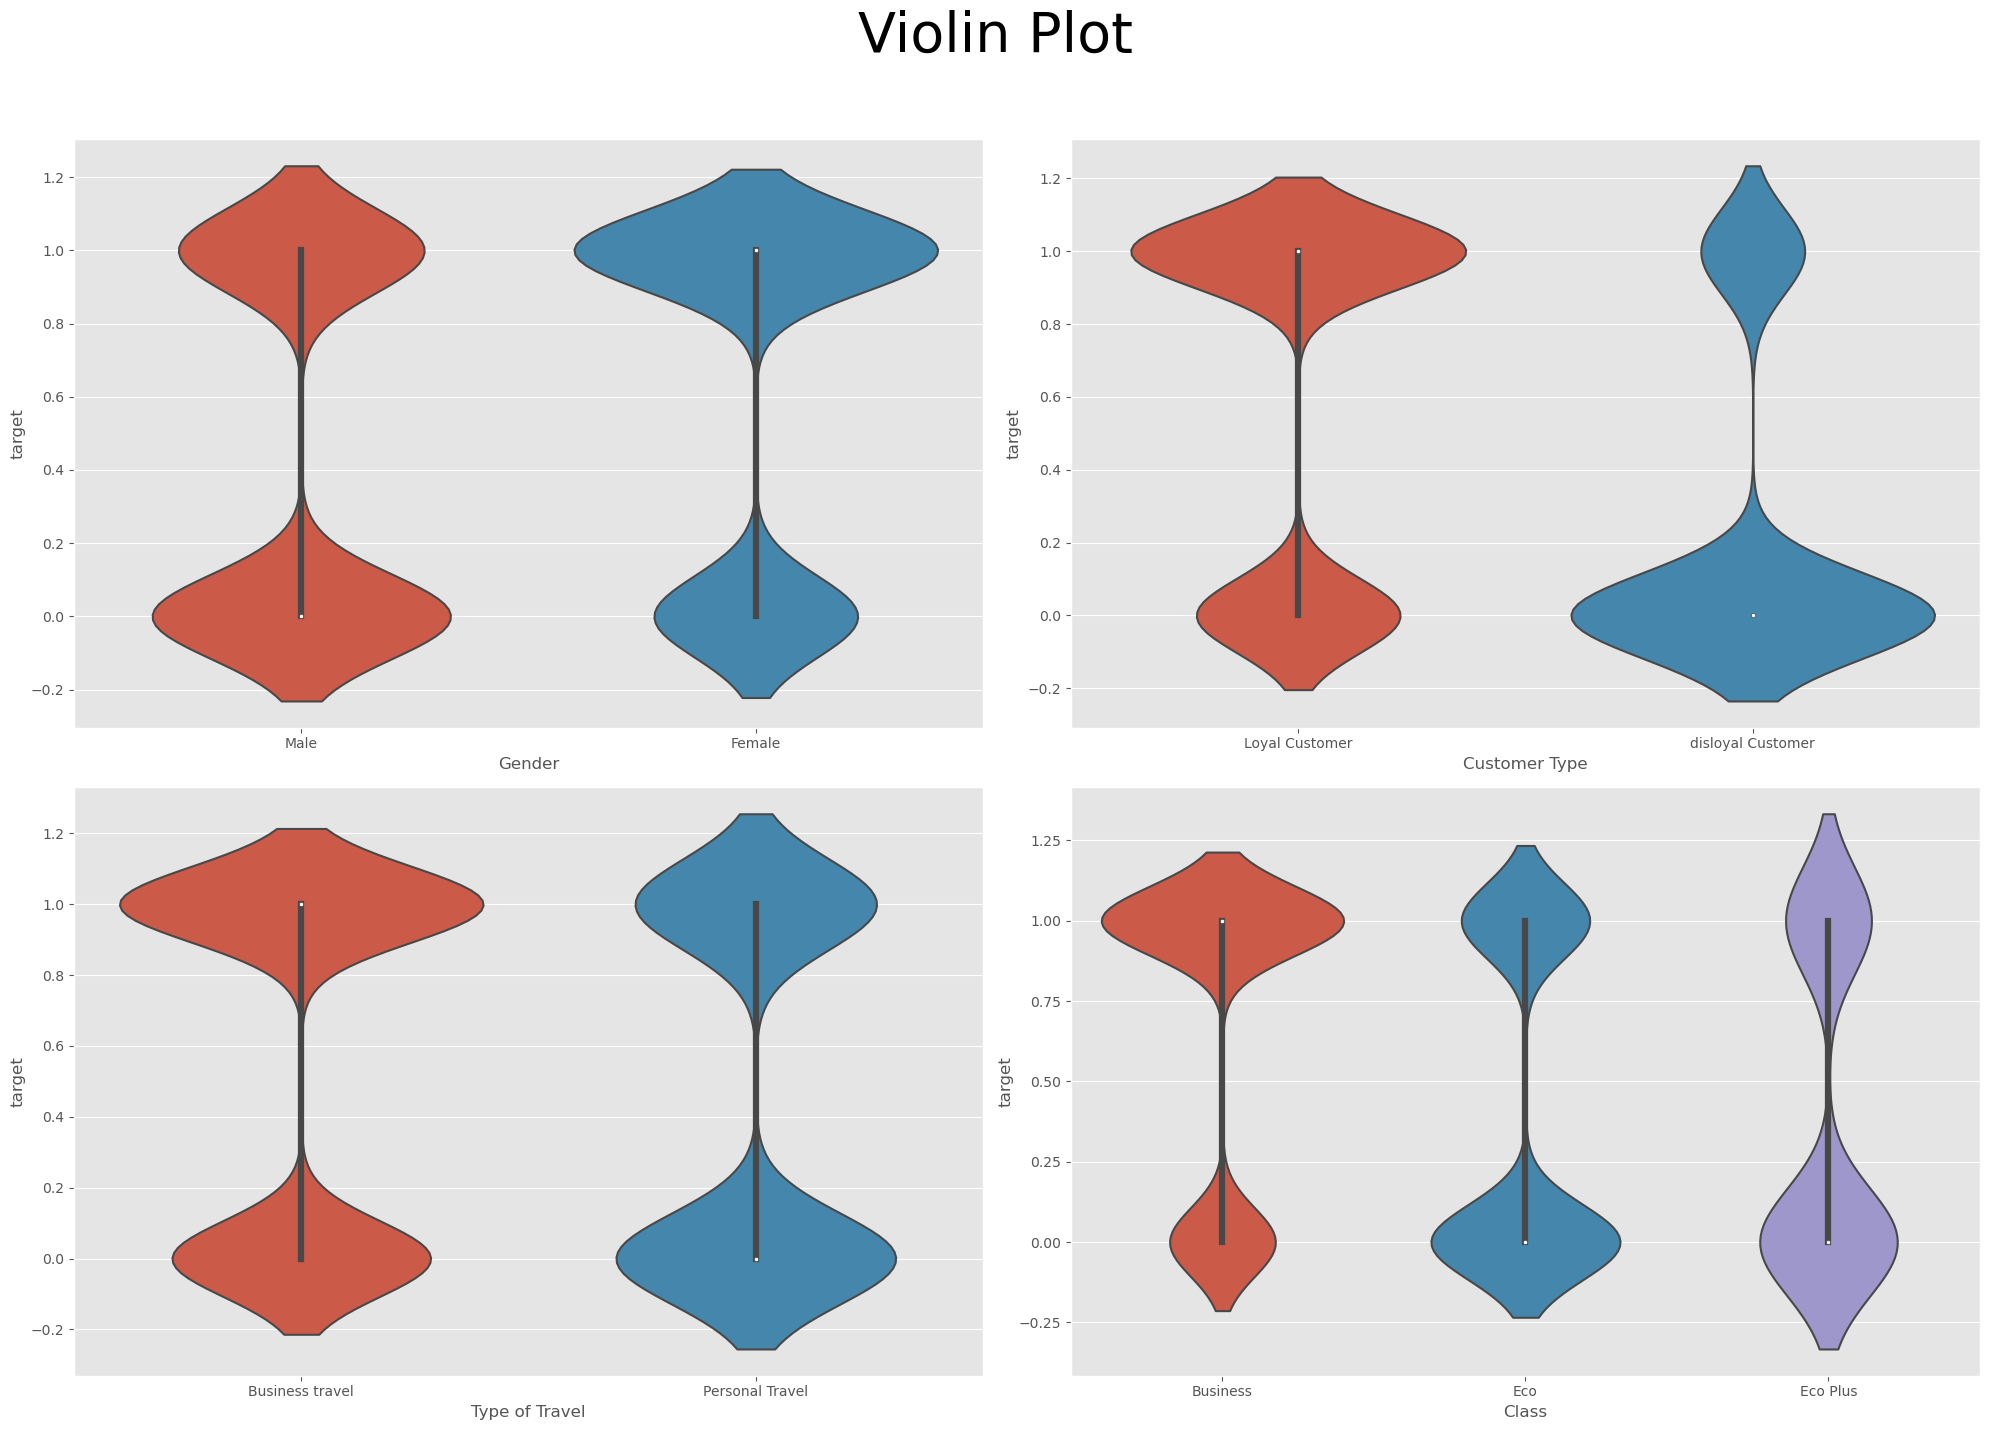

In [4]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = train.columns[train.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= train[categorical_feature[i]], y=train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

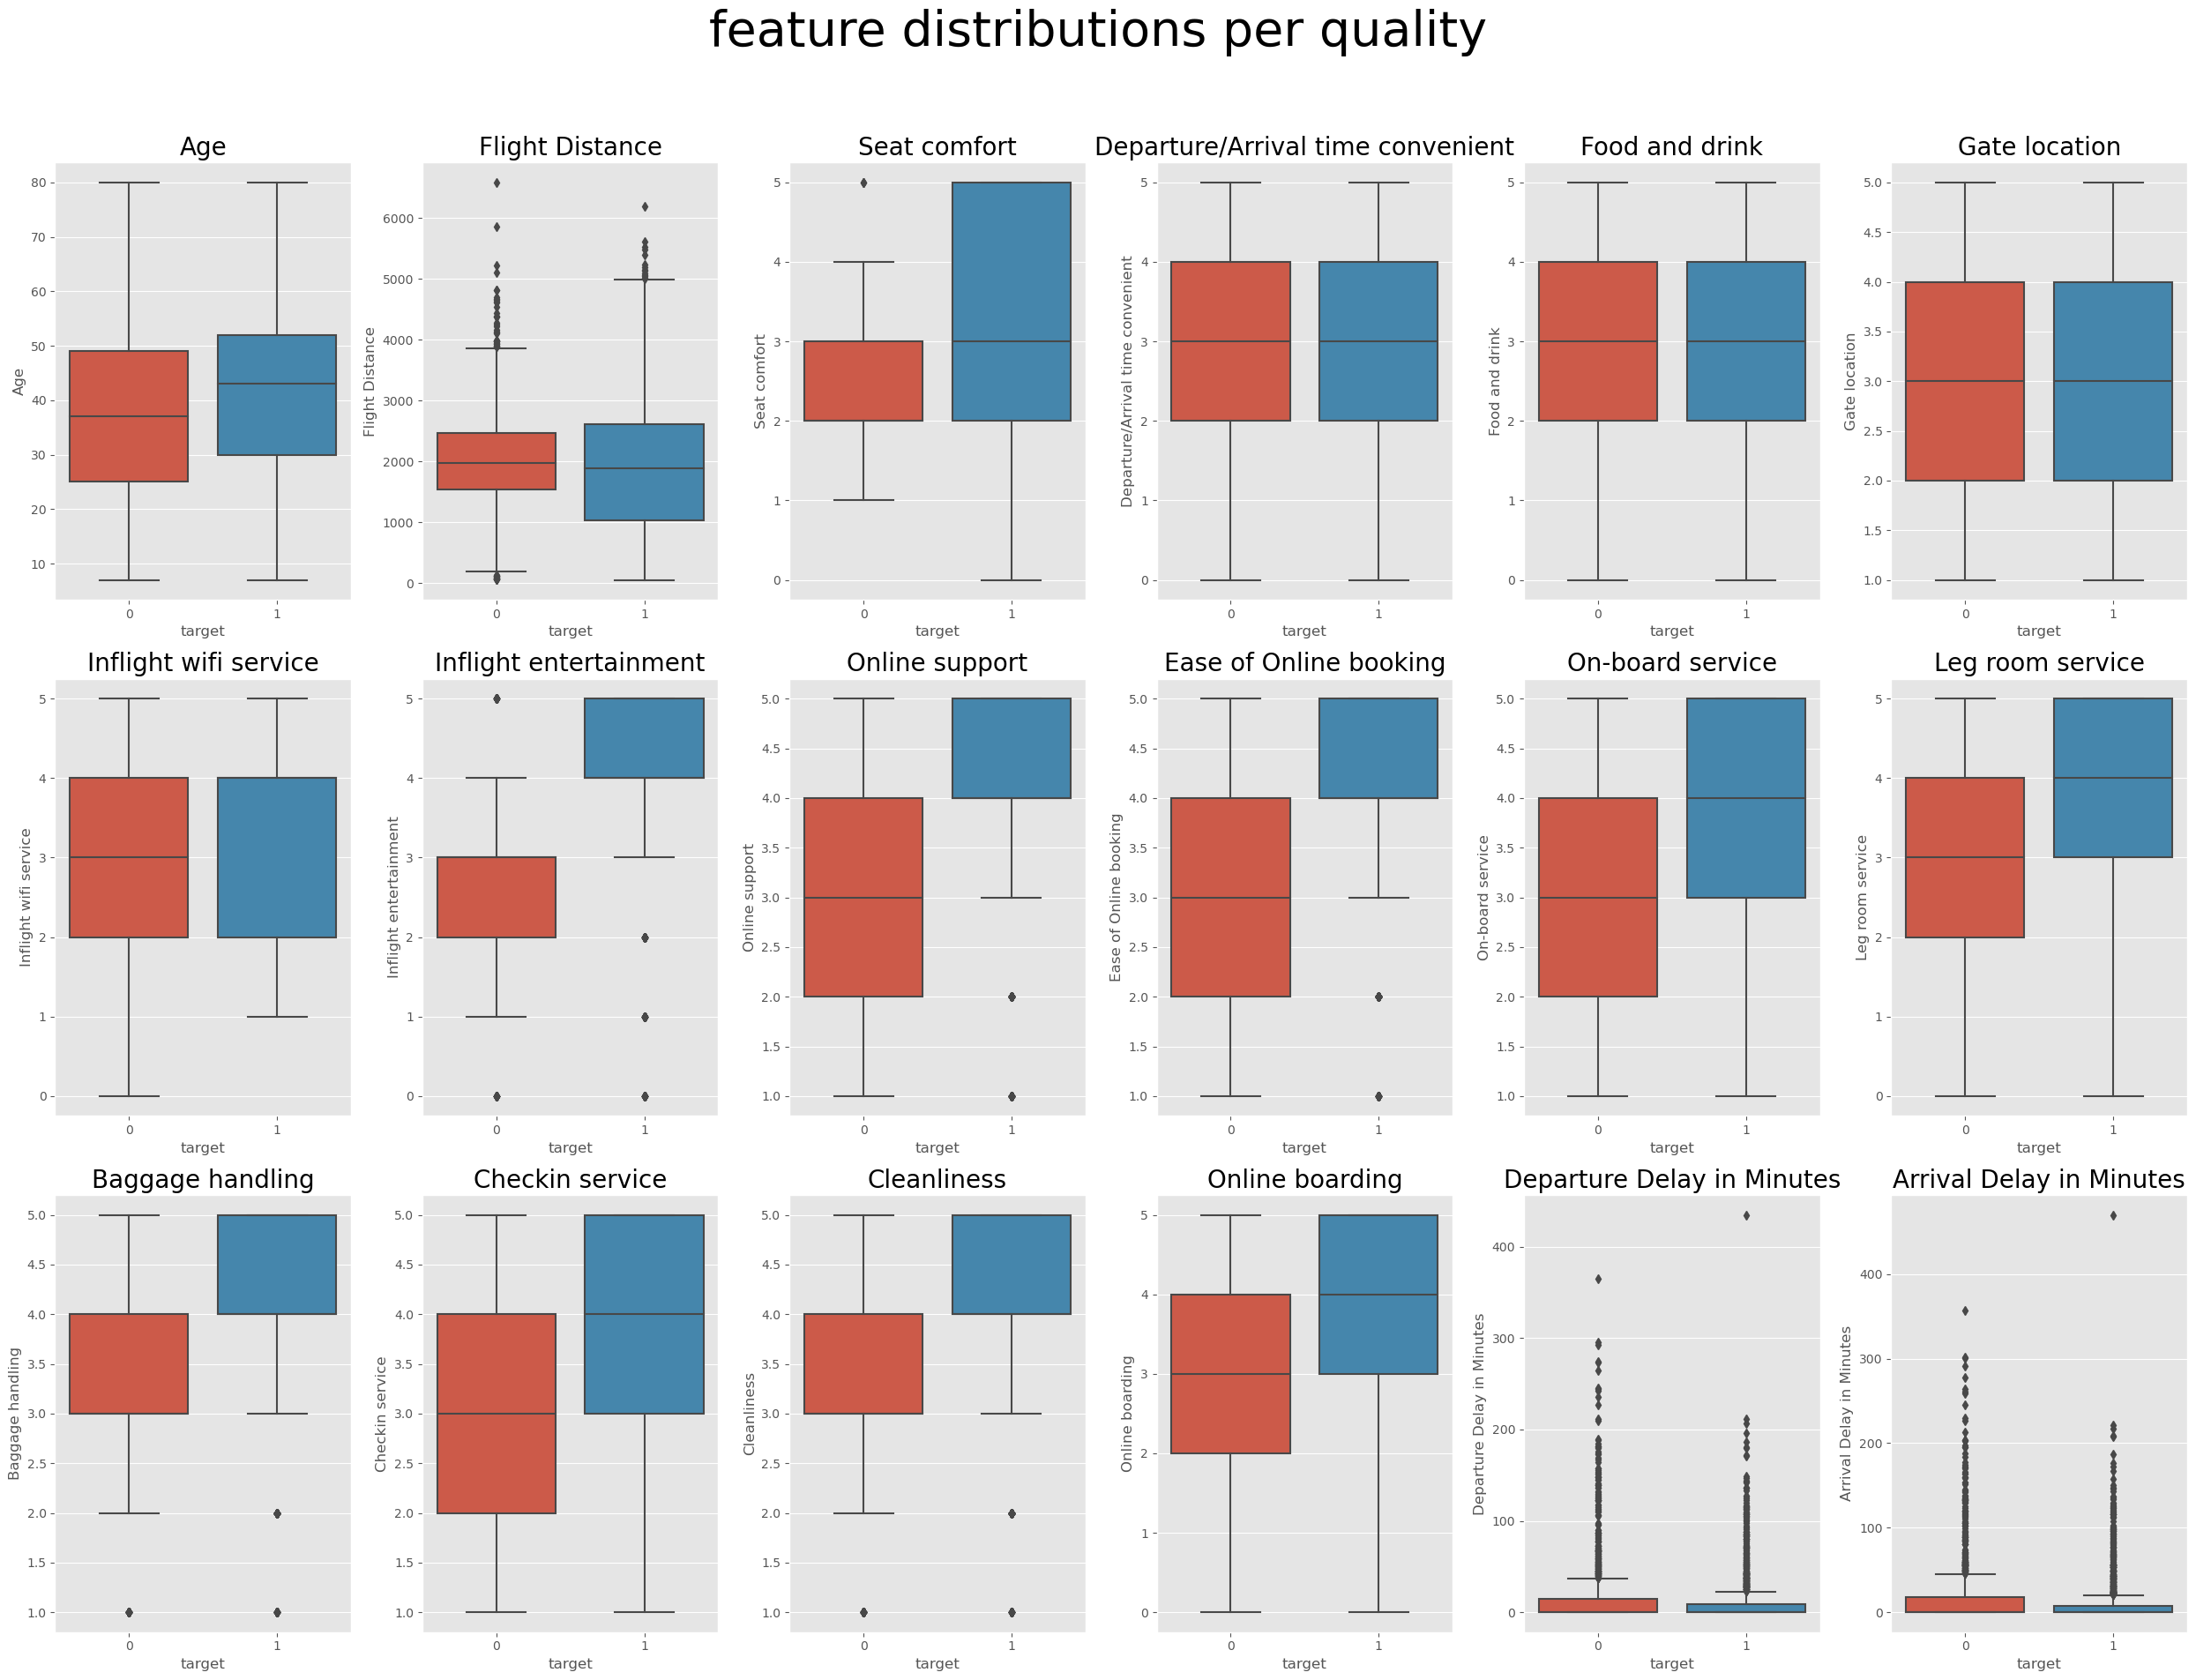

In [5]:
# 수치형 데이터 분리
numeric_feature = train.columns[(train.dtypes=='int64') | (train.dtypes=='float')]
num_data = train[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 전처리

In [6]:
train = pd.read_csv(r"train_final.csv").drop(columns=['id'])

#### 열 제거

In [7]:
# 박스 플롯에서 target 변수에 영향이 없는 열 제거
train = train.drop(columns=['Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service'])

# 상관관계가 낮은(0.1 이하인) 열 제거
train = train.drop(columns=['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

#### 나이 범주화

In [8]:
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80]
bins_label = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
train['Age_binning'] = pd.cut(train['Age'], bins=bins_age, labels=bins_label, include_lowest=True)
train = train.drop(columns=['Age'])
train

,Gender,Customer Type,Type of Travel,Class,Seat comfort,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,target,Age_binning
0,Male,Loyal Customer,Business travel,Business,1,5,5,2,2,3,2,5,2,0,1,71-80
1,Male,Loyal Customer,Business travel,Business,2,1,2,2,2,2,2,4,2,0,0,31-40
2,Male,disloyal Customer,Business travel,Eco,4,4,1,1,3,2,5,1,4,0,1,31-40
3,Female,Loyal Customer,Personal Travel,Eco,5,1,1,1,4,1,4,1,5,0,1,11-20
4,Male,disloyal Customer,Business travel,Eco,2,2,5,5,2,5,3,1,2,0,0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,Female,Loyal Customer,Personal Travel,Eco,3,4,5,2,2,2,2,4,2,1,1,31-40
2995,Male,Loyal Customer,Business travel,Business,1,4,4,1,1,1,1,3,1,3,0,51-60
2996,Male,Loyal Customer,Business travel,Business,4,2,2,4,4,4,4,3,4,4,0,41-50
2997,Male,Loyal Customer,Personal Travel,Eco,3,3,1,1,4,4,3,3,4,1,0,41-50


#### 원-핫 인코딩

In [9]:
train = pd.get_dummies(train, columns=['Age_binning', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype=int)
train

,Seat comfort,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,...,Age_binning_71-80,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,5,5,2,2,3,2,5,2,0,...,1,0,1,1,0,1,0,1,0,0
1,2,1,2,2,2,2,2,4,2,0,...,0,0,1,1,0,1,0,1,0,0
2,4,4,1,1,3,2,5,1,4,0,...,0,0,1,0,1,1,0,0,1,0
3,5,1,1,1,4,1,4,1,5,0,...,0,1,0,1,0,0,1,0,1,0
4,2,2,5,5,2,5,3,1,2,0,...,0,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,3,4,5,2,2,2,2,4,2,1,...,0,1,0,1,0,0,1,0,1,0
2995,1,4,4,1,1,1,1,3,1,3,...,0,0,1,1,0,1,0,1,0,0
2996,4,2,2,4,4,4,4,3,4,4,...,0,0,1,1,0,1,0,1,0,0
2997,3,3,1,1,4,4,3,3,4,1,...,0,0,1,1,0,0,1,0,1,0


#### 이상치 제거

In [10]:
# 상관관계 0.3 이상인 열 이상치 제거
columns_to_normalize = ['Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Online boarding']

# 정규화
scaler = StandardScaler()
train[columns_to_normalize] = scaler.fit_transform(train[columns_to_normalize])

# z-score 이상치 제거 함수
def mark_and_count_outliers_zscore(df, columns, threshold=1.5):
    outlier_flags = pd.DataFrame(index=df.index)
    outlier_counts = {}

    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        z_scores = (df[column] - mean) / std
        outliers = z_scores.abs() > threshold
        outlier_count = outliers.sum()
        outlier_counts[column] = outlier_count
        outlier_flags[column] = outliers

    outlier_rows = outlier_flags.any(axis=1)
    return df[~outlier_rows], outlier_counts

# 이상치 제거 함수 적용
train_cleaned, outlier_counts = mark_and_count_outliers_zscore(train, columns_to_normalize)
train = train_cleaned.reset_index(drop=True)

for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

print()
print(f'Total Outlier: {2999-len(train)}')
print(f'Remaining Rows: {len(train)}')

Inflight entertainment: 333 outliers
Online support: 336 outliers
Ease of Online booking: 296 outliers
On-board service: 277 outliers
Online boarding: 356 outliers

Total Outlier: 879
Remaining Rows: 2120


In [11]:
train

,Seat comfort,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,...,Age_binning_71-80,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,4,0.452691,0.360481,0.393429,-1.193885,5,4,1,1,0.488236,...,0,1,0,1,0,1,0,0,1,0
1,2,-1.059977,-1.164319,-1.147908,-1.193885,1,3,4,3,-1.041774,...,0,0,1,1,0,1,0,1,0,0
2,4,0.452691,0.360481,0.393429,0.402753,4,4,5,4,1.253241,...,0,1,0,1,0,1,0,1,0,0
3,4,0.452691,1.122881,0.393429,0.402753,3,3,4,2,0.488236,...,0,1,0,1,0,1,0,0,1,0
4,2,1.209024,1.122881,0.393429,0.402753,4,4,4,4,1.253241,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,3,-0.303643,1.122881,1.164097,-0.395566,2,4,4,4,1.253241,...,0,0,1,1,0,0,1,0,1,0
2116,4,-0.303643,-1.164319,-1.147908,0.402753,5,4,3,5,-1.041774,...,0,0,1,1,0,0,1,0,1,0
2117,4,0.452691,0.360481,0.393429,-0.395566,2,5,4,4,0.488236,...,0,0,1,1,0,1,0,1,0,0
2118,4,-1.059977,-1.164319,0.393429,0.402753,4,4,3,4,0.488236,...,0,0,1,1,0,1,0,1,0,0


### 전처리 후 상관관계 확인

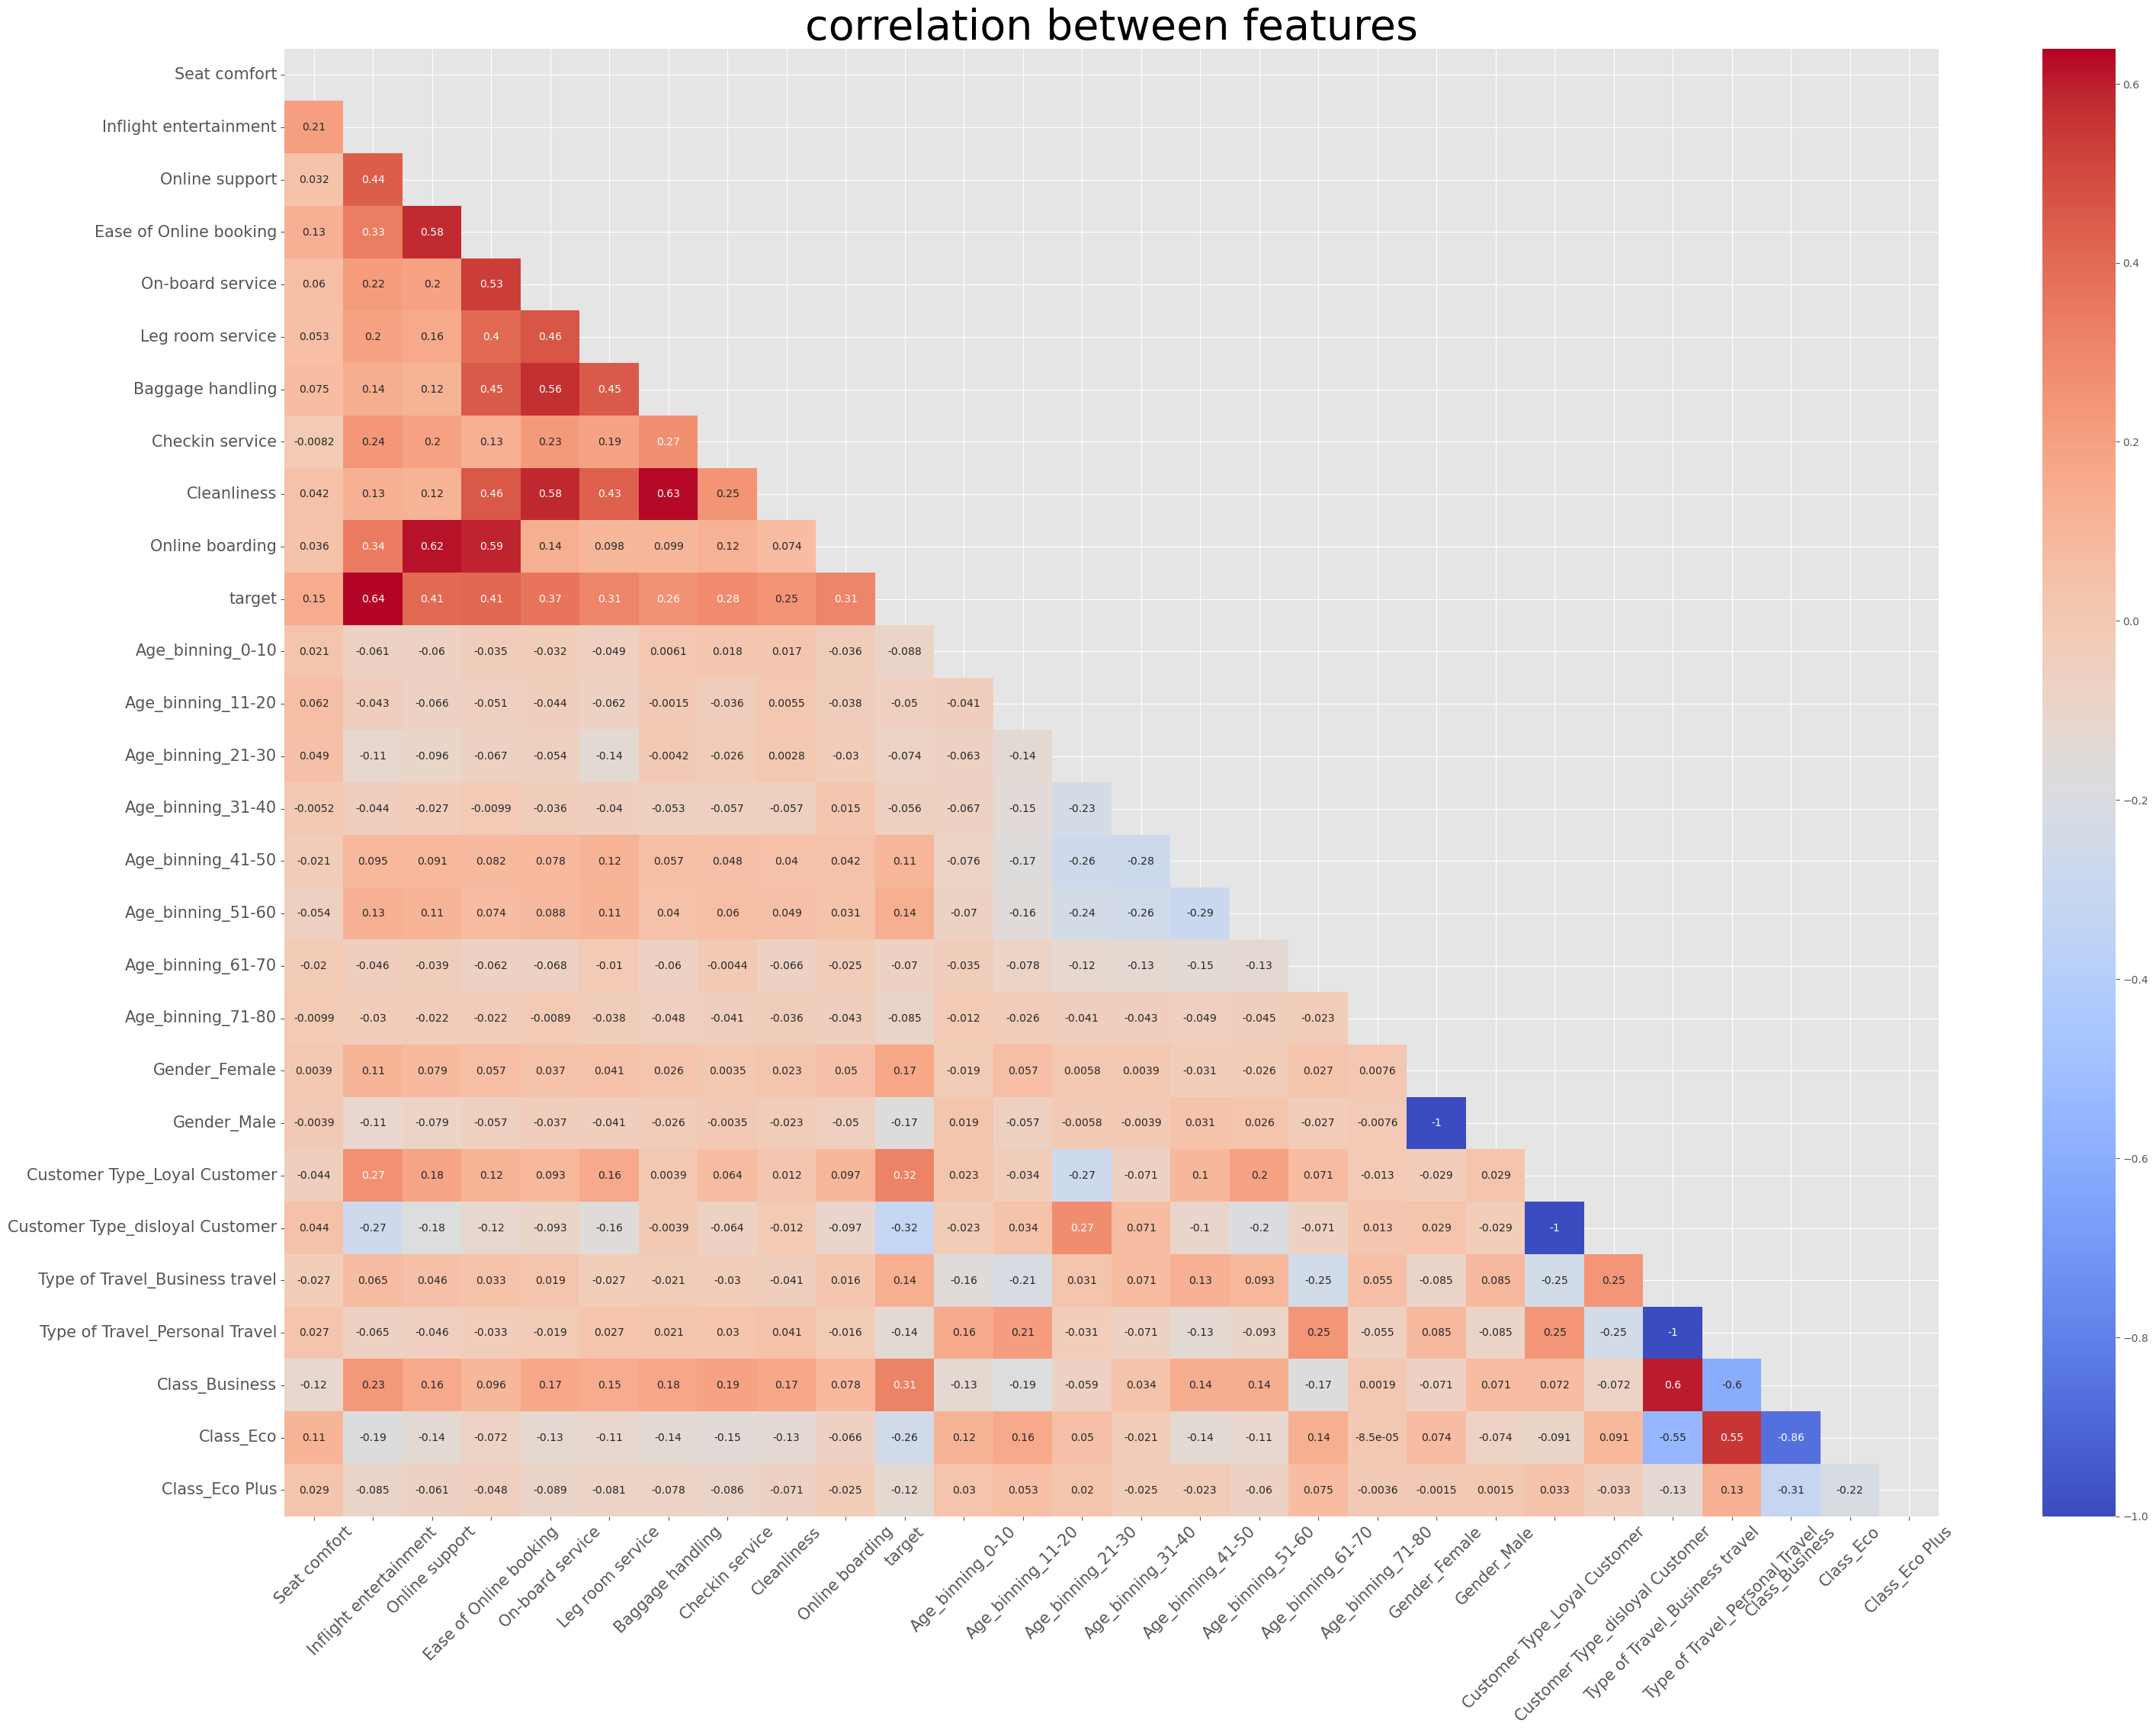

In [12]:
corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

plt.figure(figsize=(35,25))
heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

# 모델링

In [13]:
# %pip install lightgbm
# %pip install xgboost

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split,  GridSearchCV
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from xgboost import XGBClassifier

## 1. 전처리 하지 않은 모델
라벨 인코딩으로만 전처리하여 실행한 모델

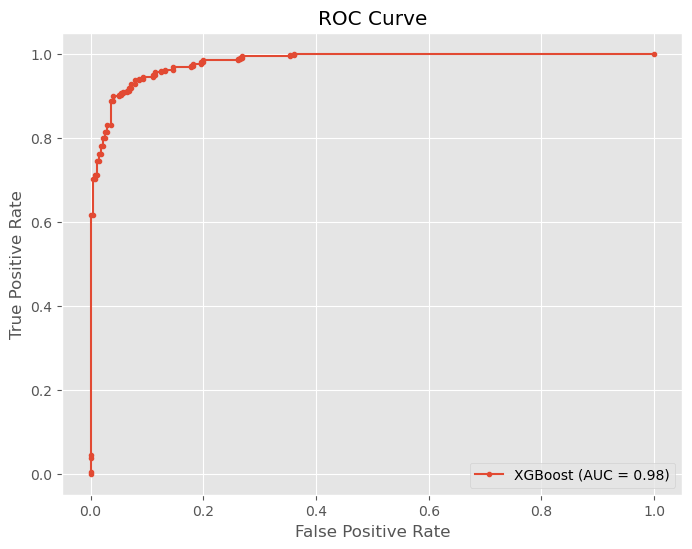

====== XGBoost Model Performance ======
XGBoost Accuracy Score: 0.9233333333333333
XGBoost Cross Validation Score: 0.928646633277685
XGBoost - AUC: 0.98
XGBoost - Confusion Matrix:
[[263  19]
 [ 27 291]]
XGBoost - Precision: 0.9387
XGBoost - Recall: 0.9151


In [15]:
train = pd.read_csv(r"train_final.csv").drop(columns=['id'])

# 라벨 인코딩
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  
            label_maps[col] = label_map
    return label_maps

def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) 
    return dataframe

train_label_map = make_label_map(train)
train = label_encoder(train, train_label_map)


X = train.drop(columns=['target'])
y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
name = 'XGBoost'

model.fit(X_train, y_train)
y_preds = model.predict(X_test)
score = accuracy_score(y_test, y_preds)
cv_score = cross_val_score(model, X, y, cv=5)
conf_matrix = confusion_matrix(y_test, y_preds)
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# ROC Curve plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'{name} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print(f'====== {name} Model Performance ======')
print(f'{name} Accuracy Score: {score}')
print(f'{name} Cross Validation Score: {cv_score.mean()}')
print(f'{name} - AUC: {roc_auc:.2f}')
print(f'{name} - Confusion Matrix:\n{conf_matrix}')
print(f'{name} - Precision: {precision_score(y_test, y_preds):.4f}')
print(f'{name} - Recall: {recall_score(y_test, y_preds):.4f}')

## 2. 전처리 한 모델

====== Outlier Counts ======
Inflight entertainment: 333 outliers
Online support: 336 outliers
Ease of Online booking: 296 outliers
On-board service: 277 outliers
Online boarding: 356 outliers

Total Outlier: 879
Remaining Rows: 2120


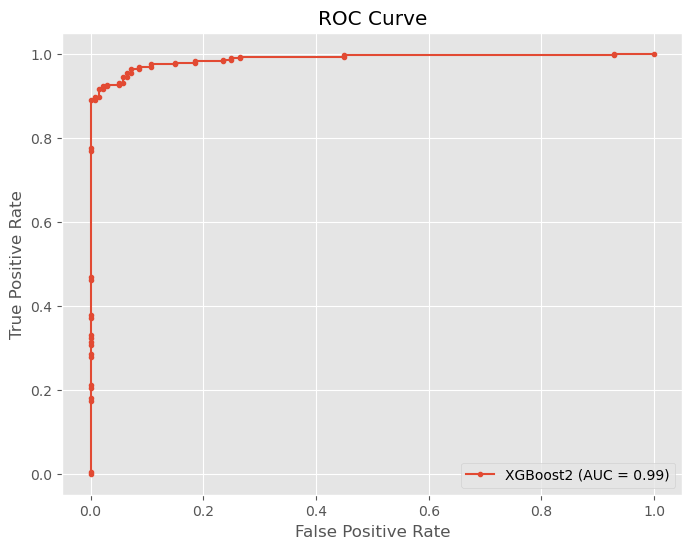

====== XGBoost2 Model Performance ======
XGBoost2 Accuracy Score: 0.9504716981132075
XGBoost2 Cross Validation Score: 0.9367924528301887
XGBoost2 - AUC: 0.99
XGBoost2 - Confusion Matrix:
[[128  12]
 [  9 275]]
XGBoost2 - Precision: 0.9582
XGBoost2 - Recall: 0.9683


In [21]:
train2 = pd.read_csv(r"train_final.csv").drop(columns=['id'])

# 박스 플롯에서 target 변수에 영향이 없는 열 제거
train2 = train2.drop(columns=['Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service'])
# 상관관계가 낮은(0.1 이하인) 열 제거
train2 = train2.drop(columns=['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

# 나이 범주화
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80]
bins_label = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
train2['Age_binning'] = pd.cut(train2['Age'], bins=bins_age, labels=bins_label, include_lowest=True)
train2 = train2.drop(columns=['Age'])

# 원 핫 인코딩
train2 = pd.get_dummies(train2, columns=['Age_binning', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype=int)

# 상관관계 0.3 이상인 열 이상치 제거
columns_to_normalize = ['Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Online boarding']

    # 정규화
scaler = StandardScaler()
train2[columns_to_normalize] = scaler.fit_transform(train2[columns_to_normalize])

    # z-score 이상치 제거 함수
def mark_and_count_outliers_zscore(df, columns, threshold=1.5):
    outlier_flags = pd.DataFrame(index=df.index)
    outlier_counts = {}

    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        z_scores = (df[column] - mean) / std
        outliers = z_scores.abs() > threshold
        outlier_count = outliers.sum()
        outlier_counts[column] = outlier_count
        outlier_flags[column] = outliers

    outlier_rows = outlier_flags.any(axis=1)
    return df[~outlier_rows], outlier_counts

    # 이상치 제거 함수 적용
train_cleaned, outlier_counts = mark_and_count_outliers_zscore(train2, columns_to_normalize)
train2 = train_cleaned.reset_index(drop=True)

print("====== Outlier Counts ======")
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

print()

print(f'Total Outlier: {2999-len(train2)}')
print(f'Remaining Rows: {len(train2)}')

X2 = train2.drop(columns=['target'])
y2 = train2.target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = XGBClassifier(gamma=0.1)
name2 = 'XGBoost2'

model2.fit(X_train2, y_train2)
y_preds2 = model2.predict(X_test2)
score2 = accuracy_score(y_test2, y_preds2)
cv_score2 = cross_val_score(model2, X2, y2, cv=5)
conf_matrix2 = confusion_matrix(y_test2, y_preds2)
y_probs2 = model2.predict_proba(X_test2)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test2, y_probs2)
roc_auc2 = roc_auc_score(y_test2, y_probs2)


# ROC Curve plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, marker='.', label=f'{name2} (AUC = {roc_auc2:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print(f'====== {name2} Model Performance ======')
print(f'{name2} Accuracy Score: {score2}')
print(f'{name2} Cross Validation Score: {cv_score2.mean()}')
print(f'{name2} - AUC: {roc_auc2:.2f}')
print(f'{name2} - Confusion Matrix:\n{conf_matrix2}')
print(f'{name2} - Precision: {precision_score(y_test2, y_preds2):.4f}')
print(f'{name2} - Recall: {recall_score(y_test2, y_preds2):.4f}')

In [22]:
print(f'====== {name} Model Performance ======')
print(f'{name} Accuracy Score: {score}')
print(f'{name} Cross Validation Score: {cv_score.mean()}')
print(f'{name} - AUC: {roc_auc:.2f}')
print(f'{name} - Confusion Matrix:\n{conf_matrix}')
print(f'{name} - Precision: {precision_score(y_test, y_preds):.4f}')
print(f'{name} - Recall: {recall_score(y_test, y_preds):.4f}')


print('\n')

print(f'====== {name2} Model Performance ======')
print(f'{name2} Accuracy Score: {score2}')
print(f'{name2} Cross Validation Score: {cv_score2.mean()}')
print(f'{name2} - AUC: {roc_auc2:.2f}')
print(f'{name2} - Confusion Matrix:\n{conf_matrix2}')
print(f'{name2} - Precision: {precision_score(y_test2, y_preds2):.4f}')
print(f'{name2} - Recall: {recall_score(y_test2, y_preds2):.4f}')

====== XGBoost Model Performance ======
XGBoost Accuracy Score: 0.9233333333333333
XGBoost Cross Validation Score: 0.928646633277685
XGBoost - AUC: 0.98
XGBoost - Confusion Matrix:
[[263  19]
 [ 27 291]]
XGBoost - Precision: 0.9387
XGBoost - Recall: 0.9151


====== XGBoost2 Model Performance ======
XGBoost2 Accuracy Score: 0.9504716981132075
XGBoost2 Cross Validation Score: 0.9367924528301887
XGBoost2 - AUC: 0.99
XGBoost2 - Confusion Matrix:
[[128  12]
 [  9 275]]
XGBoost2 - Precision: 0.9582
XGBoost2 - Recall: 0.9683


## 제출용 파일 생성

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# CSV 파일 읽기 및 전처리
test = pd.read_csv(r"test_final.csv").drop(columns=['id'])
test = test.drop(columns=['Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service'])
test = test.drop(columns=['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

# 나이 범주화
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80]
bins_label = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
test['Age_binning'] = pd.cut(test['Age'], bins=bins_age, labels=bins_label, include_lowest=True)
test = test.drop(columns=['Age'])

# 원 핫 인코딩
test = pd.get_dummies(test, columns=['Age_binning', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype=int)

# 상관관계 0.3 이상인 열 정규화
columns_to_normalize = ['Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Online boarding']
scaler = StandardScaler()
test[columns_to_normalize] = scaler.fit_transform(test[columns_to_normalize])

# 모델 예측
y_preds2 = model2.predict(test)

# 예측 결과 이진화
pred_bin = (y_preds2 > 0.5).astype(int)

# 결과를 sample_submission에 저장
sample_submission = pd.read_csv('sample_submission_final.csv')
sample_submission['target'] = pred_bin
sample_submission.to_csv("submission.csv", index=False)
